In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("insurance_pre.csv")
dataset

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [3]:
#Now we are going to convert categorial data column (Sex and Smoker) as Numerical numbers using One Hot Encoding 
dataset=pd.get_dummies(dataset) # while giving drop_first=True function it'll drop State_California column.
dataset

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes
0,19,27.900,0,16884.92400,1,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0
2,28,33.000,3,4449.46200,0,1,1,0
3,33,22.705,0,21984.47061,0,1,1,0
4,32,28.880,0,3866.85520,0,1,1,0
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0
1334,18,31.920,0,2205.98080,1,0,1,0
1335,18,36.850,0,1629.83350,1,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0


In [4]:
dataset.columns 

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes'],
      dtype='object')

In [5]:
#Input and output split
#Data was already preprocessed. Now we are going to perform Input and output variables split
independent=dataset[['age', 'bmi', 'children', 'sex_female', 'sex_male','smoker_no', 'smoker_yes']] 
independent #Now 'age', 'bmi', 'children', 'sex_female', 'sex_male','smoker_no', 'smoker_yes' column values seperately assigned into independent varaiable, Independent means input, Dependent means output.

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes
0,19,27.900,0,1,0,0,1
1,18,33.770,1,0,1,1,0
2,28,33.000,3,0,1,1,0
3,33,22.705,0,0,1,1,0
4,32,28.880,0,0,1,1,0
...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0
1334,18,31.920,0,1,0,1,0
1335,18,36.850,0,1,0,1,0
1336,21,25.800,0,1,0,1,0


In [6]:
#Now 'charges' column value seperately assigned into dependent varaiable, dependent means output.
dependent=dataset[["charges"]] #Now charges value seperately assigned into dependent varaiable,
dependent
#Now we got seperatley independent and dependent varaiables. now sucessfully splited input and output

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [7]:
#Split Trainset and Testset. 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(independent, dependent, test_size=0.30, random_state=0) 

In [98]:
#Model Creation
#ML algorithm all are provided by sklearn, we are creting this Model using trainset and tesset varaiable. 
from sklearn.tree import DecisionTreeRegressor # While calling, this line loaded into memory. here DecisionTreeRegressor may be function or class. In this line DecisionTreeRegressor considered as class
regressor=DecisionTreeRegressor(criterion='mae',max_features='auto',splitter='best') #Parameterized function we are assigning into regressor varaiable.it consider as class, all the function under this class assign to regressor.
regressor.fit(X_train,y_train) #fit function we are calling it using access operator, now passing splited trainset input and output.

DecisionTreeRegressor(criterion='mae', max_depth=None, max_features='auto',
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

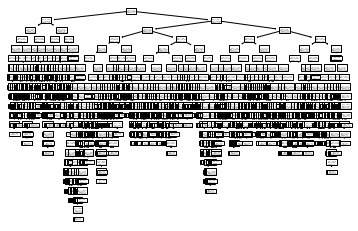

In [99]:
import matplotlib.pyplot as plt #here we taken matplotlib.pyplot python library, this library responsible for graph purpose.
from sklearn import tree # from skleran importing tree function
tree.plot_tree(regressor) # Anthat treela 'plot_tree' functionla Model saved in 'regressor'. now regressor pass and give plt.show()our graph will show. let see how graph will show
plt.show() #Now our Graph will show
#SLR we have seen weight and bias, MLR (5 varaiable means 5 varaiable weight and bias we have seen),SVM(we have seen what all are support vector),Decision tree will create in Graph structure, here we are createing tree Graph.
#Decision tree will create in Graph structure,

In [100]:
#Evaluation metrix(R2 using)
y_pred=regressor.predict(X_test) #y-pred is varaiable, all are saved in regressor(formula,weight,bais), predict is application function.
#Evaluation matrix should happened on Testdataset .Anyone of the Testset values not included into Trandataset values. so that we are using it for crosss predition
#y-test is Actual data(y_test), X_test is brain predicted outptut.so that we are using it for crosss prediction

In [101]:
from sklearn.metrics import r2_score #using this r2_score function going to find R2 value.
r_score=r2_score(y_test,y_pred) #r2_score assigned to r_score variable, now passing Actual output(y_test) and predicted output(y_pred)
#r2_score result nearly 1 means it's Good model, nearly to 0 means bad model
#Now it nearly to 1. our model is performing well. our model learned well while performing crosscheck. evaluation matrix cross checking our model and it'll confirm particular model is performing well or not. 

In [102]:
r_score

0.690157321060222